In [1]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# For reproducibility
RANDOM_STATE = 42


In [3]:
# 📁 Step 2: Load the Data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

train.head()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
# 🧹 Step 3: Data Cleaning and Preprocessing

# Drop ID for training purposes
X = train.drop(['id', 'Personality'], axis=1)
y = train['Personality']
test_ids = test['id']
X_test = test.drop(['id'], axis=1)

# Encode target
y = y.map({'Introvert': 0, 'Extrovert': 1})

# Encode binary categorical variables
binary_cols = ['Stage_fear', 'Drained_after_socializing']
for col in binary_cols:
    X[col] = X[col].map({'Yes': 1, 'No': 0})
    X_test[col] = X_test[col].map({'Yes': 1, 'No': 0})

# Impute missing values using median for numeric and most_frequent for binary
imputer_numeric = SimpleImputer(strategy='median')
imputer_binary = SimpleImputer(strategy='most_frequent')

X[binary_cols] = imputer_binary.fit_transform(X[binary_cols])
X_test[binary_cols] = imputer_binary.transform(X_test[binary_cols])

X = pd.DataFrame(imputer_numeric.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(imputer_numeric.transform(X_test), columns=X_test.columns)

X.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0
2,6.0,1.0,1.0,0.0,0.0,3.0,0.0
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0
4,1.0,0.0,4.0,4.0,0.0,13.0,5.0


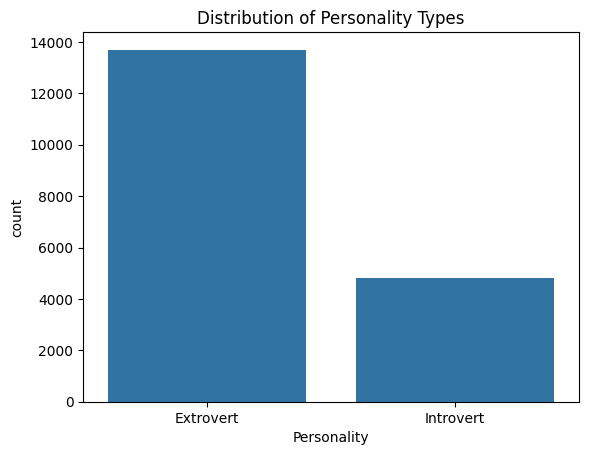

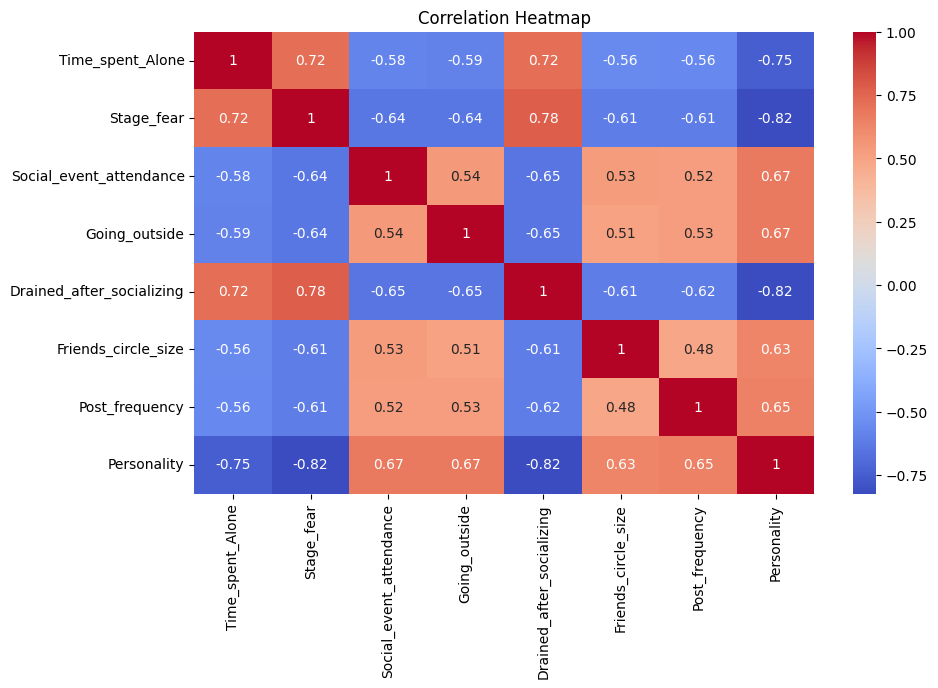

In [5]:
# 📊 Step 4: Exploratory Data Analysis (EDA)

# Count of each class
sns.countplot(x=train['Personality'])
plt.title("Distribution of Personality Types")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       952
           1       0.97      0.98      0.98      2753

    accuracy                           0.96      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



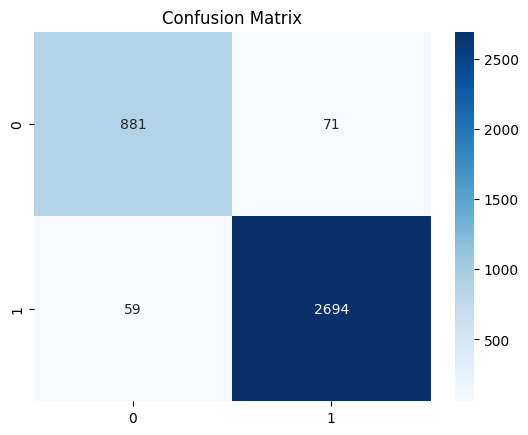

In [6]:
# 🤖 Step 5: Model Training (Random Forest)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [7]:
# 🔍 Step 6: Cross-validation Accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Cross-validated Accuracy: 0.9639 ± 0.0045


In [8]:
# 📤 Step 7: Predict on Test Set & Prepare Submission

test_preds = model.predict(X_test)
sample_submission['Personality'] = test_preds
sample_submission['Personality'] = sample_submission['Personality'].map({0: 'Introvert', 1: 'Extrovert'})

# Save to CSV
sample_submission.to_csv("final_submission.csv", index=False)
sample_submission.head()


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
